In [116]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
#%config InlineBackend.figure_format = 'retina'  # if you use a Mac with Retina display

In [117]:
#import csv
import numpy as np
import pandas as pd
data=pd.read_csv('heart_failure_clinical_records_dataset.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [119]:
to_drop = ['DEATH_EVENT']
data.drop(to_drop, inplace=True, axis=1)
data.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [120]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

In [161]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
data_normalized_pca2d = pca.fit_transform(data_normalized)

In [162]:
pca.explained_variance_ratio_

array([0.13858049, 0.13159129, 0.10567855, 0.09299485, 0.0858236 ,
       0.08240632])

(-2.971846426806736, 3.316875447255178, -4.327259532825451, 6.192139660988943)

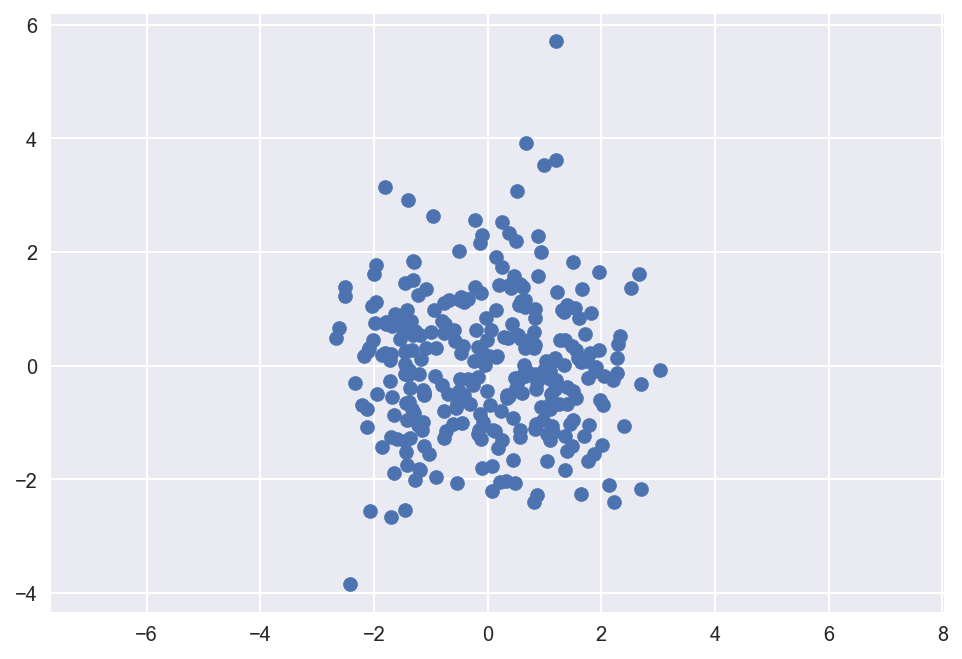

In [163]:
plt.scatter(data_normalized_pca2d[:, 0], data_normalized_pca2d[:, 1])
plt.axis('equal')

In [124]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)                    # note: in practice you should actually play with the perplexity, learning rate, and number of iterations
data_normalized_tsne2d = tsne.fit_transform(data_normalized)

(-22.621366308410533,
 22.312709615905653,
 -19.567533335008545,
 19.465101084031982)

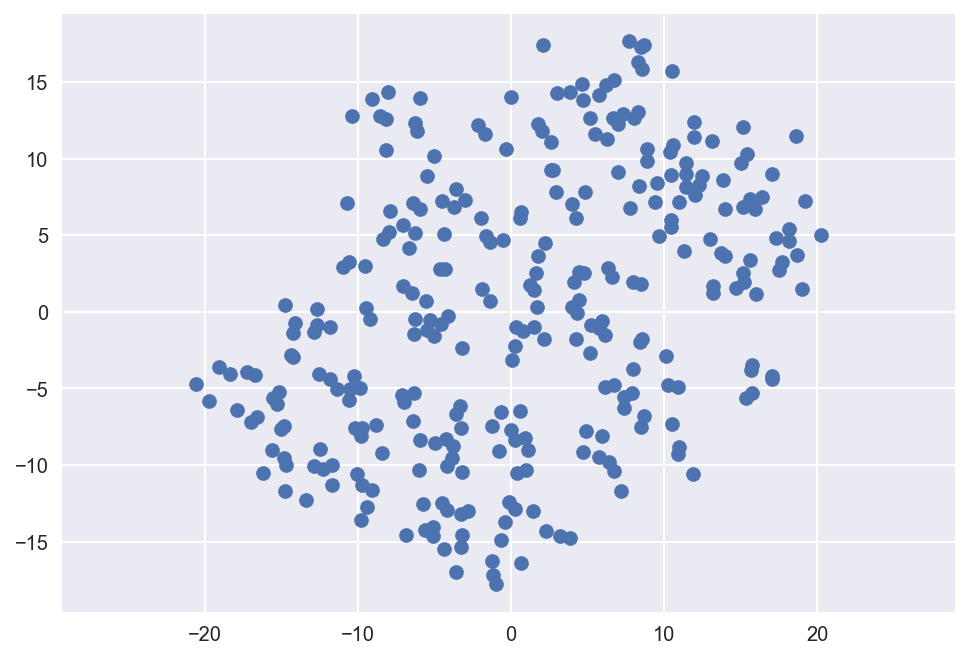

In [125]:
plt.scatter(data_normalized_tsne2d[:, 0], data_normalized_tsne2d[:, 1])
plt.axis('equal')

In [149]:
from sklearn.cluster import KMeans     
kmeans = KMeans(n_clusters=2, n_init=1000, random_state=0)
kmeans.fit(data_normalized_tsne2d)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=1000, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [127]:
kmeans.cluster_centers_                               # cluster centers,and the ordering of these cluster_centers totally do not matter # below is 6 clusters' centers

array([[ 7.0898128,  5.78495  ],
       [-6.7533035, -6.64582  ]], dtype=float32)

In [128]:
kmeans.labels_  # cluster assignments, for each of the point I fit the model to, what is the cluster assignment for that point, the value would be 0,1,2

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0])

In [129]:
# kmeans_cluster_assignments = kmeans.labels_

# alternatively, we can do: and it will give you the same result as from line [12]
kmeans_cluster_assignments = kmeans.predict(data_normalized_tsne2d)
# .predict will give you the cluster assignment based the data point you feed in

(-22.621366308410533,
 22.312709615905653,
 -19.567533335008545,
 19.465101084031982)

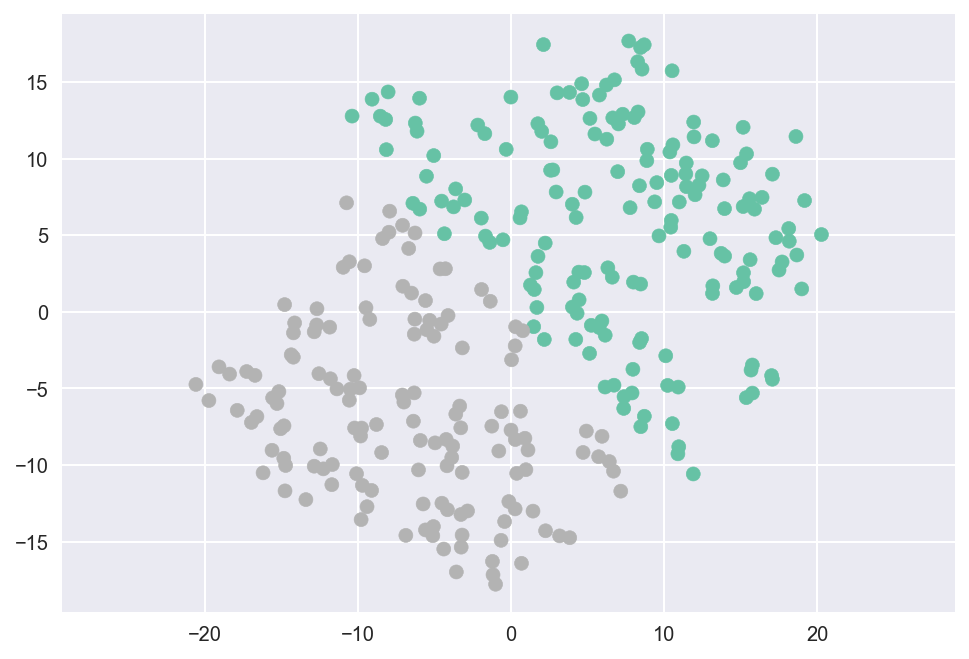

In [130]:
plt.scatter(data_normalized_tsne2d[:, 0],
            data_normalized_tsne2d[:, 1],
            c=kmeans_cluster_assignments, cmap='Set2')
# - `c` specifies how the different points should be colored (here, I set it to the
#   cluster assignments so different clusters get different colors)
plt.axis('equal')

In [131]:
from sklearn.mixture import GaussianMixture                                       #GaussianMixture: is a python class

gmm = GaussianMixture(n_components=2, n_init=1000, random_state=0)
# gmm is created from GaussianMixture class
# n_compopents:  like # of clusters 
gmm.fit(data_normalized_tsne2d)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1000,
                precisions_init=None, random_state=0, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [132]:
# GMM takes more time to fit than K-means. 1st, GMM is initialized by K-means. 2nd, it needs to keep track of additional info, like the ellipse shape, probability
gmm.weights_  # cluster probabilities, the ordering of these does not matter at all

array([0.58724787, 0.41275213])

In [133]:
gmm.means_  # cluster centers

array([[ 5.52769178,  5.55245125],
       [-6.27917057, -7.88504542]])

In [134]:
np.sort(gmm.weights_)[::-1]     #bigger probability means bigger cluster

array([0.58724787, 0.41275213])

(-22.621366308410533,
 22.312709615905653,
 -19.567533335008545,
 19.465101084031982)

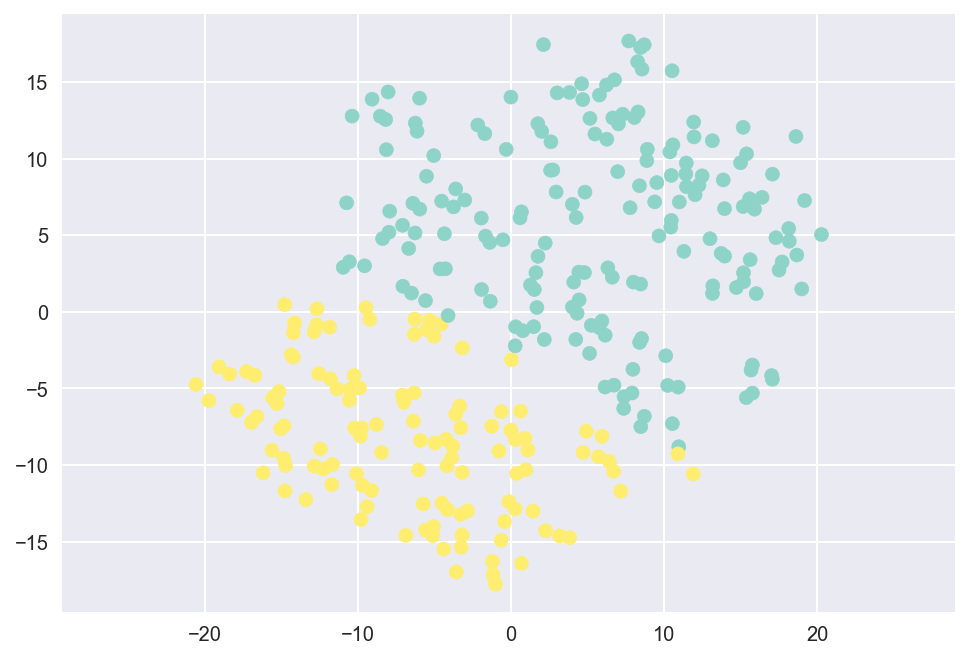

In [135]:
gmm_cluster_assignments = gmm.predict(data_normalized_tsne2d)
plt.scatter(data_normalized_tsne2d[:, 0],
            data_normalized_tsne2d[:, 1],
            c=gmm_cluster_assignments, cmap='Set3')
plt.axis('equal')

In [136]:
gmm_cluster_assignments == 1
# internally, true is stored as 1 and false is stored as 0 : true means the data point is stored in cluster 2

array([ True, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
        True,  True,  True,  True, False, False,  True, False,  True,
       False, False, False,  True, False,  True,  True,  True, False,
       False,  True, False,  True, False, False, False,  True,  True,
       False, False, False, False,  True, False,  True, False,  True,
        True, False, False, False, False, False, False,  True, False,
       False,  True, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False,  True, False,  True, False, False,  True,  True, False,
       False, False,  True, False,  True, False,  True,  True,  True,
        True, False, False, False, False,  True, False, False,  True,
       False,  True, False, False, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True,

In [137]:
len(gmm_cluster_assignments)   # there are total 1885 data points

299

In [138]:
data[gmm_cluster_assignments == 1].shape    #418 data points (people) in cluster 2

(120, 12)

In [139]:
data[gmm_cluster_assignments == 1].mean(axis=0)
# taking the above vecotrs [1: true, 0: false] and calculate the average

age                             59.661117
anaemia                          0.508333
creatinine_phosphokinase       439.833333
diabetes                         0.608333
ejection_fraction               40.133333
high_blood_pressure              0.425000
platelets                   285010.185583
serum_creatinine                 1.204667
serum_sodium                   136.641667
sex                              0.175000
smoking                          0.016667
time                           132.766667
dtype: float64

In [140]:
gmm_cluster_assignments.max()

1

Text(0, 0.5, 'Feature value')

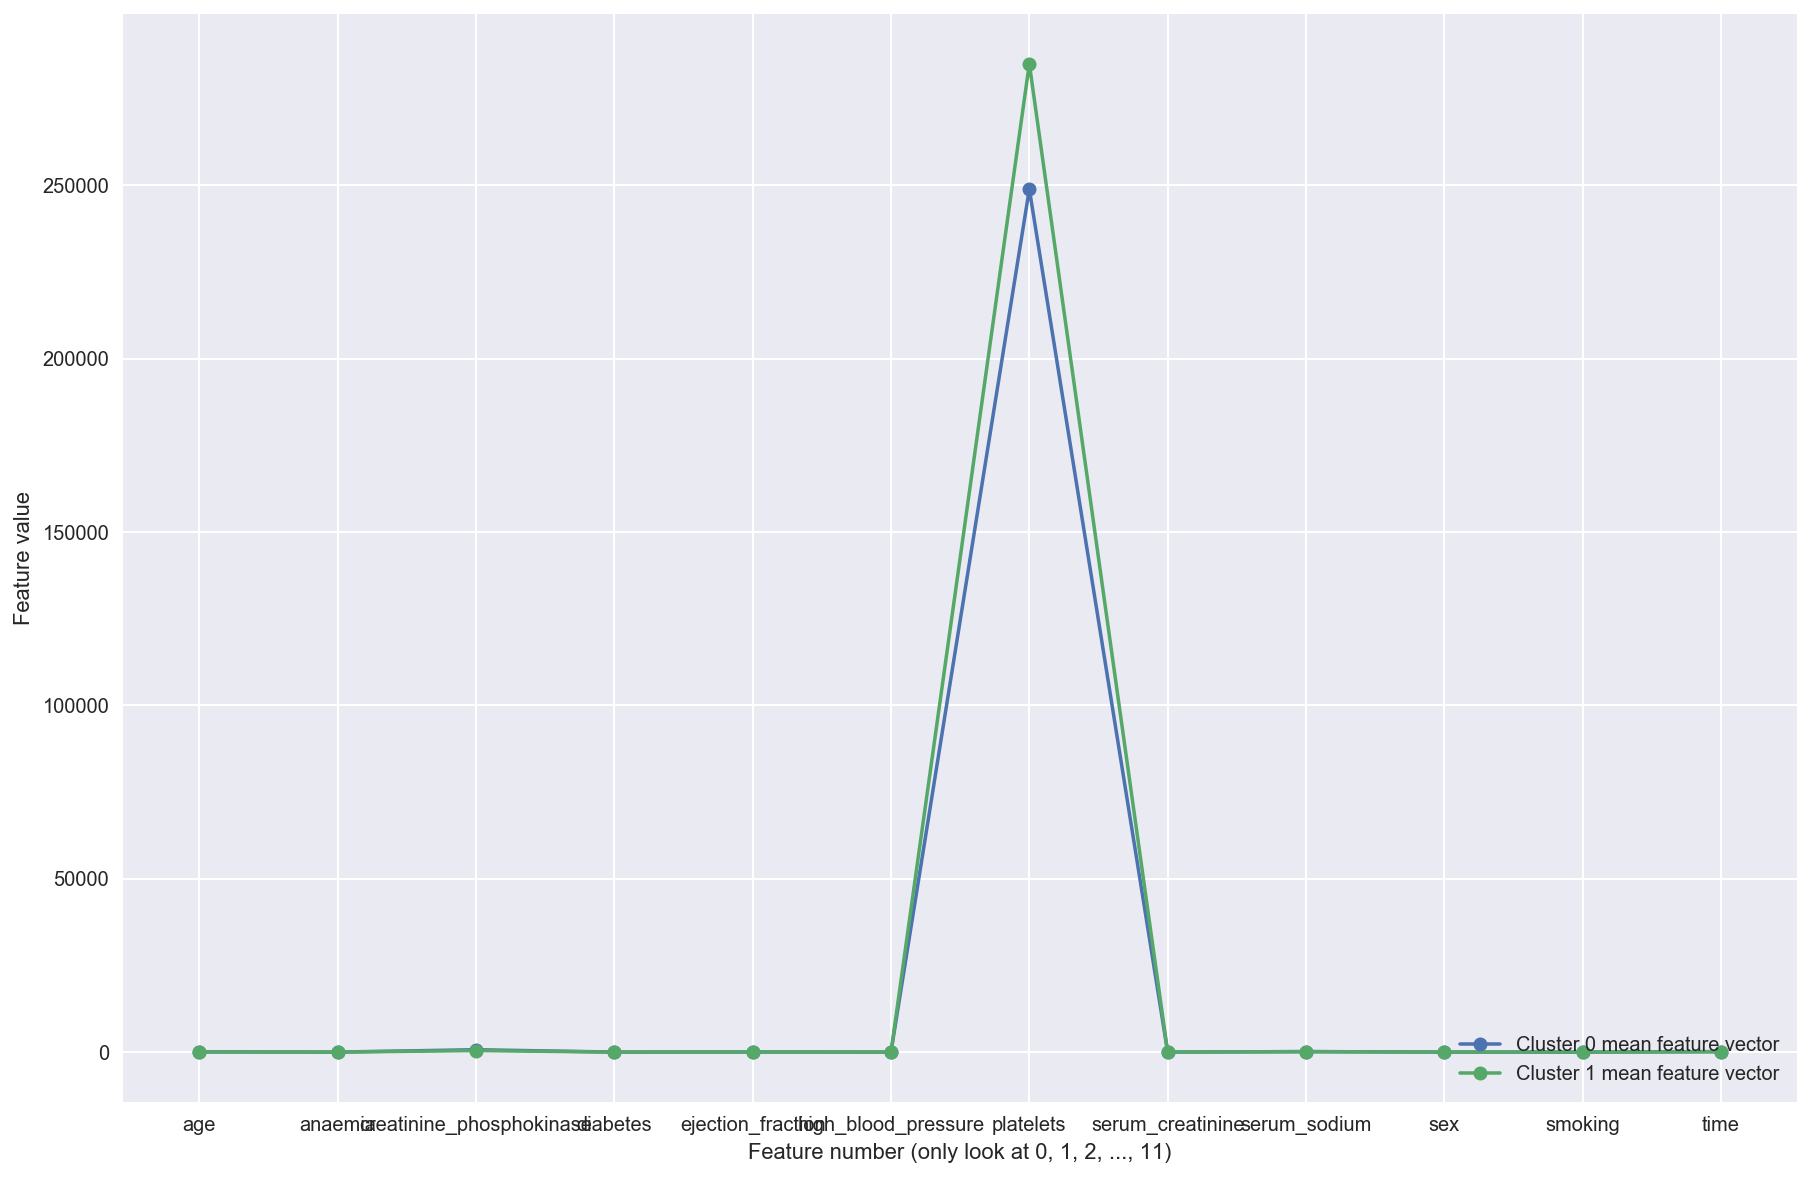

In [150]:
# feature 0 is age, and feature 1 is gender
#For example, we can plot out all the cluster centers:

plt.figure(figsize=(15, 10))
for cluster in range(gmm_cluster_assignments.max() + 1):
    plt.plot(data[gmm_cluster_assignments == cluster].mean(axis=0), 'o-',
            label=('Cluster ' + str(cluster) +' mean feature vector'))
plt.legend(loc='lower right')
plt.xlabel('Feature number (only look at 0, 1, 2, ..., 11)')
plt.ylabel('Feature value')

In [143]:
data[gmm_cluster_assignments == 1]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10
14,49.0,1,80,0,30,1,427000.00,1.0,138,0,0,12
18,70.0,1,125,0,25,1,237000.00,1.0,140,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...
288,65.0,0,892,1,35,0,263358.03,1.1,142,0,0,256
289,90.0,1,337,0,38,0,390000.00,0.9,144,0,0,256
290,45.0,0,615,1,55,0,222000.00,0.8,141,0,0,257
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271


In [151]:
from collections import Counter
def plot_histogram(feature_values, labels):
    histogram = Counter()
    for val in feature_values:
        histogram[val] += 1
    sorted_key_val_pairs = sorted(list(histogram.items()))
    sorted_keys, sorted_vals = zip(*sorted_key_val_pairs)
    plt.bar(range(len(sorted_keys)), sorted_vals)
    plt.xticks(range(len(sorted_keys)), [labels[key] for key in sorted_keys])

k = 2 has CH index 278.33441661438104
k = 3 has CH index 236.48691051421721
k = 4 has CH index 281.440251542251
k = 5 has CH index 252.61282536943506
k = 6 has CH index 285.20039218344056
k = 7 has CH index 277.3560505243593
k = 8 has CH index 251.57023725556576
k = 9 has CH index 252.8290569990664
k = 10 has CH index 302.6427272114139
k = 11 has CH index 199.72323124080125
Best k within 2, 3, ..., 10 according to CH index: 10


(-22.621366308410533,
 22.312709615905653,
 -19.567533335008545,
 19.465101084031982)

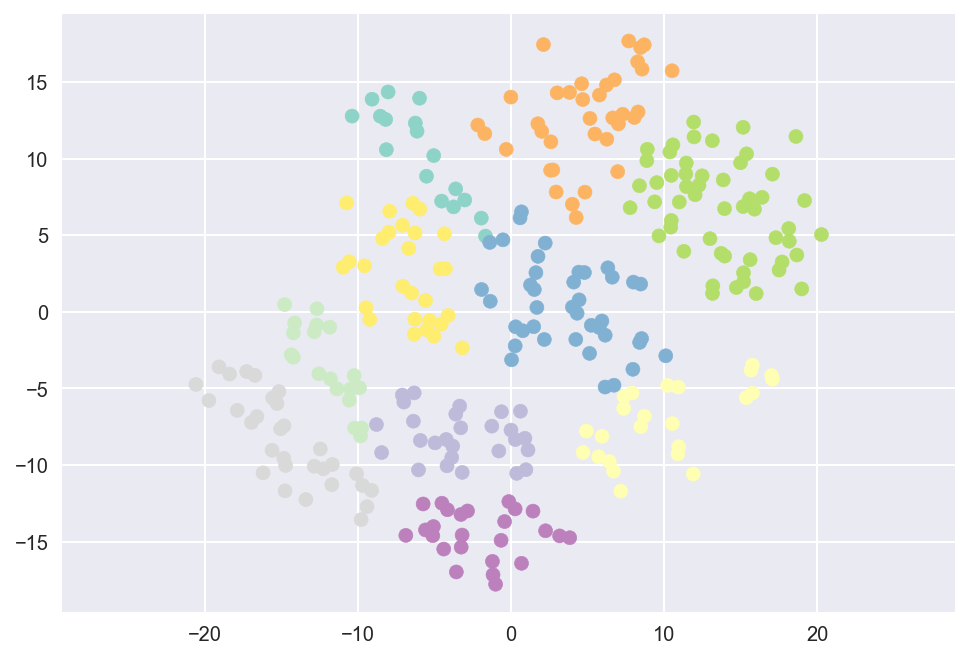

In [154]:
from sklearn.metrics import calinski_harabasz_score   # sneak case means calinski_harabasz_score is not a python function

best_score = -np.inf   # basically, you cannot get worse than that
best_k = None
best_model = None
best_cluster_assignments = None

for k in range(2, 12):
    candidate_gmm = GaussianMixture(n_components=k, n_init=100, random_state=0)
    candidate_gmm.fit(data_normalized_tsne2d)
    cluster_assignments = candidate_gmm.predict(data_normalized_tsne2d)
    score = calinski_harabasz_score(data_normalized_tsne2d, cluster_assignments)  #compute the CH index 
    
    print('k =', k, 'has CH index', score)
    
    if score > best_score:
        best_score = score
        best_k = k
        best_model = candidate_gmm
        best_cluster_assignments = cluster_assignments
    
print('Best k within 2, 3, ..., 10 according to CH index:', best_k)

# gmm_cluster_assignments = gmm.predict(drug_data_normalized_tsne2d)
plt.scatter(data_normalized_tsne2d[:, 0], data_normalized_tsne2d[:, 1],
            c=best_cluster_assignments, cmap='Set3')
plt.axis('equal')

In [84]:
from sklearn.mixture import BayesianGaussianMixture
# Below set the n_components = 100, therefore, the maximum clusters you will get is 100
dpgmm = BayesianGaussianMixture(n_components=100, max_iter=1000, n_init=10, random_state=0,
                                weight_concentration_prior=1e-8, mean_precision_prior=0.1, reg_covar=0,
                                init_params='random')
dpgmm_cluster_assignments = dpgmm.fit_predict(data_normalized_tsne2d)

print(np.sort(dpgmm.weights_)[::-1])

[3.66109370e-001 3.34499273e-001 2.99391356e-001 3.27964441e-011
 3.27971429e-019 3.27978344e-027 3.27985186e-035 3.27991956e-043
 3.27998653e-051 3.28005277e-059 3.28011828e-067 3.28018307e-075
 3.28024714e-083 3.28031047e-091 3.28037308e-099 3.28043496e-107
 3.28049611e-115 3.28055654e-123 3.28061623e-131 3.28067521e-139
 3.28073345e-147 3.28079097e-155 3.28084775e-163 3.28090382e-171
 3.28095915e-179 3.28101376e-187 3.28106763e-195 3.28112079e-203
 3.28117321e-211 3.28122490e-219 3.28127587e-227 3.28132611e-235
 3.28137562e-243 3.28142441e-251 3.28147246e-259 3.28151979e-267
 3.28156639e-275 3.28161226e-283 3.28165741e-291 3.28170183e-299
 3.28174551e-307 3.28178847e-315 3.45845952e-323 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.000000

(-22.621366308410533,
 22.312709615905653,
 -19.567533335008545,
 19.465101084031982)

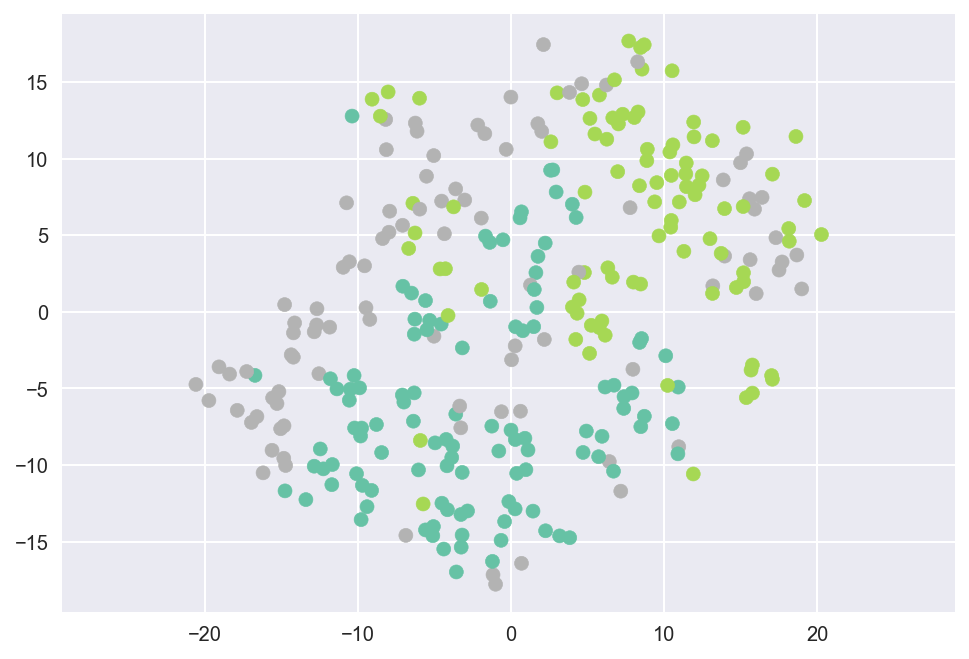

In [147]:
# note that I reorder the colors; this is done since there are so many
# colors that without careful sorting, the same color might be used for
# different clusters; here I specifically sort the colors so that 0 means
# the largest cluster, 1 means the second largest, etc (the coloring
# scheme used will in this case make the top clusters have different colors)
mapping = {rank: new_sorted_idx for new_sorted_idx, rank in enumerate(np.argsort(-dpgmm.weights_))}
new_assignments = np.array([mapping[cluster_idx] for cluster_idx in dpgmm_cluster_assignments])
plt.scatter(data_normalized_tsne2d[:, 0],
            data_normalized_tsne2d[:, 1],
            c=new_assignments, cmap='Set2')
plt.axis('equal')

(-22.621366308410533,
 22.312709615905653,
 -19.578029247111438,
 19.685515238192753)

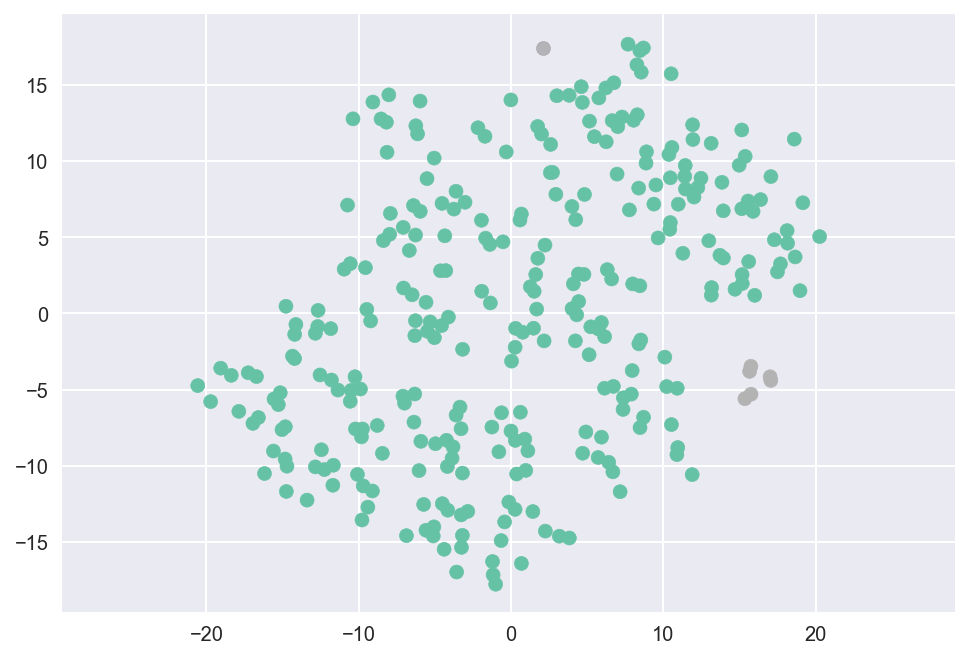

In [148]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(min_samples=5, eps=3.)
dbscan_cluster_assignments = dbscan.fit_predict(data_normalized_tsne2d)

inliers = (dbscan_cluster_assignments != -1)
plt.scatter(data_normalized_tsne2d[:, 0][inliers],
            data_normalized_tsne2d[:, 1][inliers],
            c=dbscan_cluster_assignments[inliers], cmap='Set2')
if np.any(dbscan_cluster_assignments == -1):
    plt.scatter(data_normalized_tsne2d[:, 0][~inliers],
                data_normalized_tsne2d[:, 1][~inliers],
                c='gray', alpha=.5)
plt.axis('equal')